<a href="https://colab.research.google.com/github/anshulnangru/Logistic-Regression-scratch/blob/main/LogisticRegression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression**:

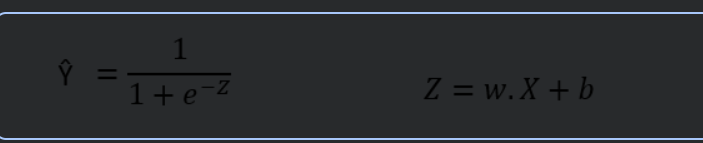

Y_hat --> predicted value

X --> Input Variable

w --> weight

b --> bias

**Gradient Descent**:

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.[link text](https://)

**Derivatives**:

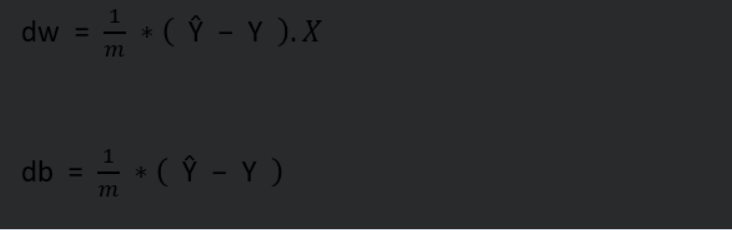

In [110]:
import numpy as np

**Logistic regression**:

In [111]:
class Logistic_Regression():

  #hyperparametersx
  def __init__(self,learning_rate,no_of_iterations):

    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations


  def fit(self,X,Y):

    #rows=m
    #columns=n
    self.m,self.n=X.shape

    self.w=np.zeros(self.n)

    self.b=0

    self.X=X

    self.Y=Y

    #implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weight()

  def update_weight(self):

    #Y_hat formula (sigmoid function)

    Y_hat=1/(1+np.exp(-(self.X.dot(self.w)+self.b)))

    #derivatives/gradients

    dw=(1/self.m)*np.dot(self.X.T,(Y_hat-self.Y))

    db=(1/self.m)*np.sum(Y_hat-self.Y)

    #updating the wights and bias using gradient descent

    self.w=self.w-self.learning_rate*dw

    self.b=self.b-self.learning_rate*db

  #Sigmoid Equations &Decision Boundary
  def predict(self,X):

    Y_pred=1/(1+np.exp(-(X.dot(self.w)+self.b)))

    Y_pred=np.where(Y_pred>0.5,1,0)

    return Y_pred



In [112]:
 import pandas as pd
 from sklearn.preprocessing import StandardScaler
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import accuracy_score

In [113]:
diabetes_dataset=pd.read_csv('/content/drive/MyDrive/ML projects datasets/diabetes.csv')

In [114]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
diabetes_dataset.shape

(768, 9)

In [116]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [117]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [118]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [119]:
features=diabetes_dataset.drop(columns='Outcome', axis=1)
target=diabetes_dataset['Outcome']

In [120]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [121]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [122]:
scaler=StandardScaler()

In [123]:
scaler.fit(features)

StandardScaler()

In [124]:
standardized_data=scaler.transform(features)

In [125]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [126]:
features=standardized_data
target=diabetes_dataset['Outcome']

In [127]:
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.3,random_state=4)

In [128]:
print(features.shape,X_train.shape,X_test.shape)

(768, 8) (537, 8) (231, 8)


In [129]:
classifier=Logistic_Regression(learning_rate=0.01,no_of_iterations=10000)

In [130]:
classifier.fit(X_train,Y_train)

In [131]:
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print(test_data_accuracy)

0.8138528138528138


In [132]:
X_train_prediction=classifier.predict(X_train)
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print(train_data_accuracy)

0.7541899441340782


Making a Predictive System

In [133]:
input_data=(6,150,72,30,0,33.6,0.627,55)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

std_data=scaler.transform(input_data_reshaped)
print(std_data)

[[ 0.63994726  0.91091809  0.14964075  0.59362962 -0.69289057  0.20401277
   0.46849198  1.85143417]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [134]:
prediction=classifier.predict(std_data)
print(prediction)

[1]


In [135]:
if(prediction[0]==0):
  print("The person is diabetic")
else:
  print("The person is not diabetic")

The person is not diabetic
